# **TikTok Sentiment Analysis**

**Install Libraries**

In [2]:
!pip install wordcloud


**Import Libraries**

WordCloud is a library used to create text visualizations based on the number of times the words appear in them so it’s easy to understand.

ImageColorGenerator is a library that generates colors using images relevant to the text’s topic.

The SentimentIntensityAnalyzer is a library that analyzes sentiment in text. This library uses a score to determine if the text being analyzed falls into the positive, negative, or neutral category.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
import plotly.express as px


In [4]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amamo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Load Dataset**

In [5]:
data = pd.read_csv("tiktok_reviews.csv")

print(data.head())


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

C:\Users\amamo\AppData\Local\Temp\ipykernel_42256\4069527867.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("tiktok_reviews.csv")


In [6]:
data = data[["content", "score"]]
print(data.head())


                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


**Drop Null Values**

In [7]:
print(data.isnull().sum())


content    31
score       0
dtype: int64


In [8]:
data = data.dropna()


**Preprocess Dataset**

1. str(text).lower(): Converts all text to lowercase.
2. re.sub(‘\[.*?\]’, ”, text): Removes any text inside square brackets, which is often used to denote tags or URLs.
3. re.sub(‘https?://\S+|www\.\S+’, ”, text): Removes any URLs.
4. re.sub(‘<.*?>+’, ”, text): Removes any HTML tags.
5. re.sub(‘[%s]’ % re.escape(string.punctuation), ”, text): Removes any punctuation.
6. re.sub(‘\n’, ”, text): Removes any newlines.
7. text = re.sub(‘\w*\d\w*’, ”, text): Removes any words containing numbers.
8. text = [word for word in text.split(‘ ‘) if word not in stopword]: Removes any stop words, which are common words that don’t add much meaning to the text (e.g. “the”, “and”).
9. ” “.join(text): Joins the remaining words back together into a single string.
10. [stemmer.stem(word) for word in text.split(‘ ‘)]: Applies stemming to the words in the text, which means reducing words to their base form (e.g., “running” becomes “run”).
11. ” “.join(text): Joins the stemmed words back together into a single string.

In [9]:
stopword=set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["content"] = data["content"].apply(clean)


<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\amamo\AppData\Local\Temp\ipykernel_42256\3163525519.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\amamo\AppData\Local\Temp\ipykernel_42256\3163525519.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\amamo\AppData\Local\Temp\ipykernel_42256\3163525519.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


**Visualize percentage of ratings**

In [10]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

figure = px.pie(data, 
                values=quantity, 
                names=numbers,hole = 0.5)
figure.show()


**Visualize Words Used By TikTok Reviewers**

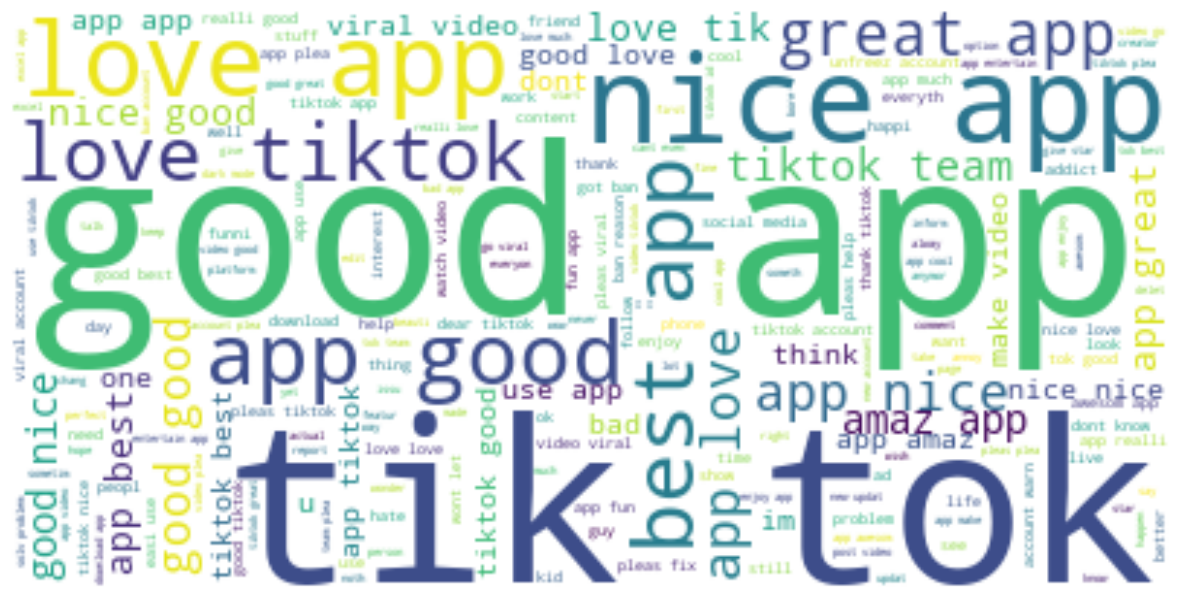

In [11]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Sentiment Analysis**

We’ll transform the score column into three new columns: Positive, Negative, and Neutral, based on the sentiment score of each user review.

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amamo\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


**Visualize Positive Reviews Words**

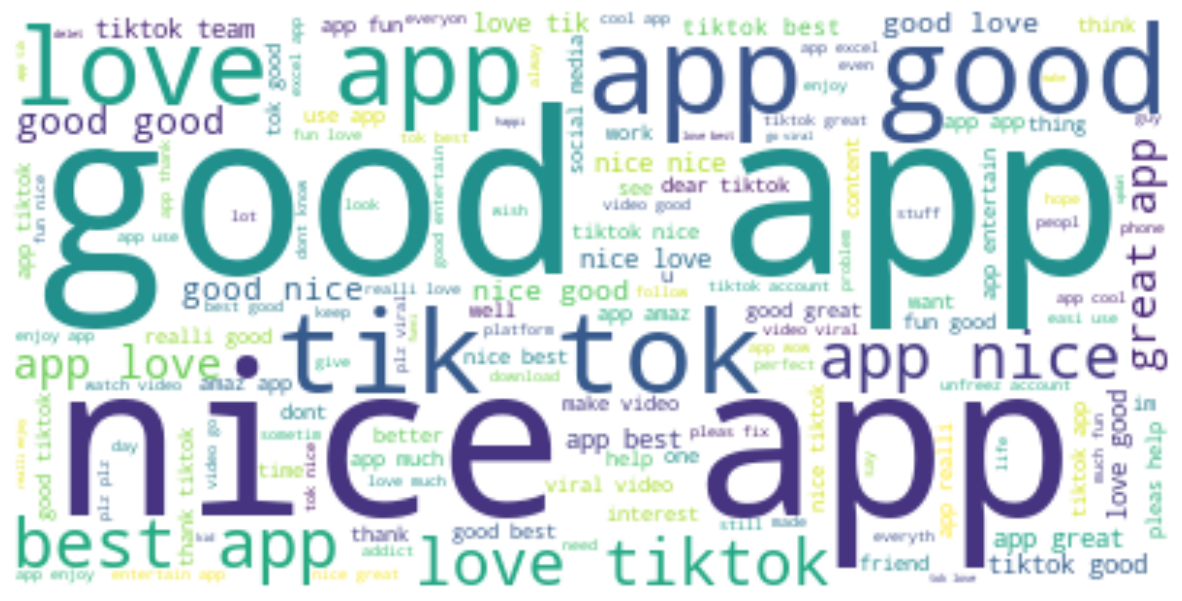

In [13]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Visualize Negative Reviews Words**

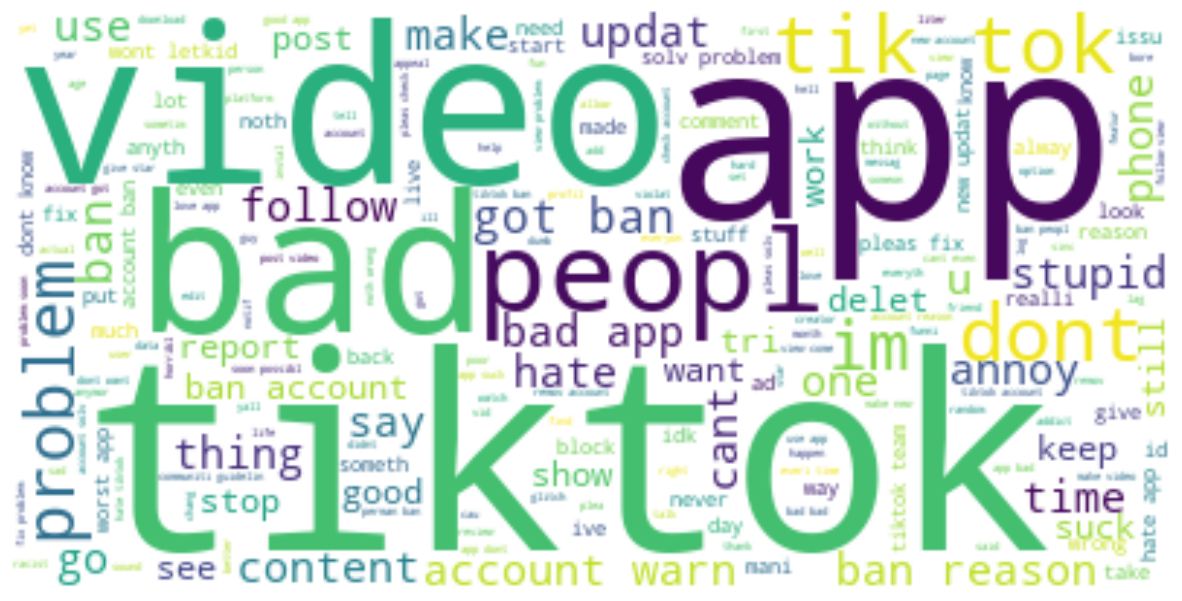

In [14]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
